In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

from gradient_fill import gradient_fill

%matplotlib inline

In [2]:
mpl.rc('lines', markersize=4)

## Make fake data

In [3]:
def p0(x, h):
    return 2*np.exp(-(x**2)/0.3)

def p1(x, h):
    return np.exp(-((x-h*6)**2)/0.5)


hs = np.linspace(0, 0.5, 6)
Qs = ['({:.1f}, {:.1f})'.format(h,h) for h in hs]
ms = [0.03*np.random.rand(1) for _ in hs]
cs = [0.2 + 0.1*np.random.rand(1) for _ in hs]

x = np.linspace(-1.5, 5, 25)
xfit = np.linspace(-1, 5, 1000)
peak0s = [p0(xfit, h) for h, m, c in zip(hs, ms, cs)]
peak1s = [p1(xfit, h) for h, m, c in zip(hs, ms, cs)]
bgs = [m*xfit +c for m, c in zip(ms, cs)]

ys = [p0(x, h) + p1(x, h) + (np.random.rand(x.size)-0.5)*0.2 + m*x + c
      for h, m, c in zip(hs, ms, cs)]


## Create figure

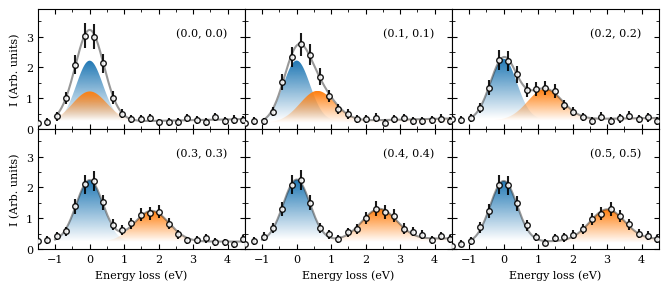

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(6+3/4, 3))

color = 'k'
for ax, y, peak0, peak1, bg, Q in zip(axs.ravel(), ys, peak0s, peak1s, bgs, Qs):
    gradient_fill(xfit, peak0+bg, fill_color='C0', ax=ax, zorder=1)
    gradient_fill(xfit, peak1+bg, fill_color='C1', ax=ax, zorder=2)
    ax.plot(xfit, peak0+peak1+bg, '-', alpha=0.5, color=[0.2]*3)
    ax.errorbar(x, y, y*0.1+0.1, fmt='o', color='k', zorder=3, markerfacecolor='w', markeredgecolor='k', alpha=0.9)
    ax.axis([-1.5, 4.5, 0, 3.9])
    ax.text(2.5, 3, Q)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

[ax.set_yticklabels('') for ax in axs[:,1:].ravel()]
[ax.set_xlabel('Energy loss (eV)') for ax in axs[1].ravel()]
[ax.set_ylabel('I (Arb. units)') for ax in axs[:,0].ravel()]

    
fig.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.97, bottom=0.15, top=0.95)

fig.savefig('ex_02_fits.pdf', dpi=600)